Import libraries

In [0]:
import numpy as np
import os
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Noise = 0.1

Import Noisy Images

In [0]:
bad_frames = '/content/drive/My Drive/natural-images/natural_images/noisy_flower/0.1'

In [3]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(224,224))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

In [4]:
print(noisy_frames.shape)

(843, 224, 224, 3)


Import Clean Images

In [0]:
good_frames = '/content/drive/My Drive/natural-images/natural_images/flower'

In [6]:
clean_frames = []
for file in tqdm(sorted(os.listdir(good_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames + '/' + file, target_size=(224,224))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)

clean_frames = np.array(clean_frames)

In [7]:
print(clean_frames.shape)

(843, 224, 224, 3)


Split Images Into Training & Test

In [8]:
round(len(noisy_frames)*0.8)

674

In [0]:
#80% of images to training set
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

Autoencoder

In [0]:
autoencoder = tf.keras.models.Sequential()
#Layer 1
autoencoder.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = (224, 224, 3)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 3
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 4
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 5
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 6
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 7
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 8
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 9
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 11
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))

In [11]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      18464     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 16)      4624      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 16)      6

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
history = autoencoder.fit(noisy_train, clean_train, epochs=50, validation_data=(noisy_test, clean_test))

Epoch 1/50
22/22 [==============================] - 5s 239ms/step - loss: 0.5821 - val_loss: 0.6815
Epoch 2/50
22/22 [==============================] - 5s 211ms/step - loss: 0.5149 - val_loss: 0.6775
Epoch 3/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5046 - val_loss: 0.6534
Epoch 4/50
22/22 [==============================] - 5s 211ms/step - loss: 0.5041 - val_loss: 0.6251
Epoch 5/50
22/22 [==============================] - 5s 212ms/step - loss: 0.4984 - val_loss: 0.6077
Epoch 6/50
22/22 [==============================] - 5s 211ms/step - loss: 0.5069 - val_loss: 0.5996
Epoch 7/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5010 - val_loss: 0.5786
Epoch 8/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5001 - val_loss: 0.5780
Epoch 9/50
22/22 [==============================] - 5s 211ms/step - loss: 0.5030 - val_loss: 0.5683
Epoch 10/50
22/22 [==============================] - 5s 211ms/step - loss: 0.4935 - val_loss: 0.5641

Model History

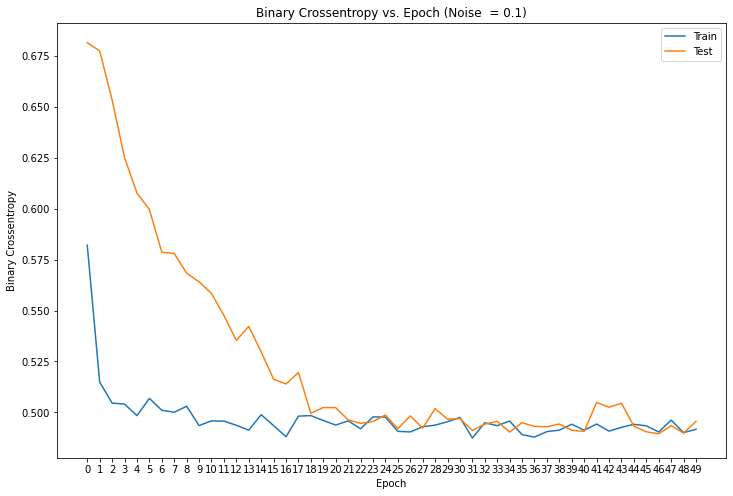

In [14]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.title('Binary Crossentropy vs. Epoch (Noise  = 0.1)')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.xticks(ticks=history.epoch, labels=history.epoch)
plt.show()

Test Autoencoder

In [0]:
results = autoencoder.predict(noisy_test)

In [0]:
image = np.random.randint(0, len(noisy_test))

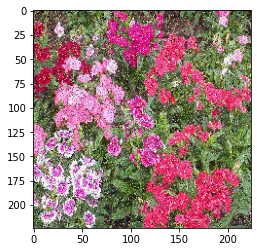

In [17]:
plt.imshow(noisy_test[image])
plt.show()

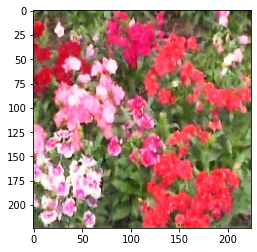

In [18]:
plt.imshow(results[image])
plt.show()

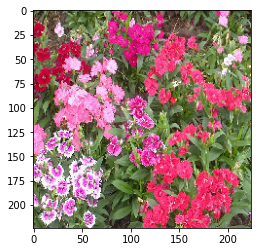

In [19]:
plt.imshow(clean_test[image])
plt.show()

# Noise = 0.25

Import Noisy Images

In [0]:
bad_frames = '/content/drive/My Drive/natural-images/natural_images/noisy_flower/0.25'

In [21]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(224,224))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

In [22]:
print(noisy_frames.shape)

(843, 224, 224, 3)


Split Images Into Training & Test

In [23]:
round(len(noisy_frames)*0.8)

674

In [0]:
#80% of images to training set
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

Autoencoder

In [0]:
autoencoder = tf.keras.models.Sequential()
#Layer 1
autoencoder.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = (224, 224, 3)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 3
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 4
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 5
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 6
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 7
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 8
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 9
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 11
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))

In [26]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 224, 224, 32)      18464     
_________________________________________________________________
batch_normalization_7 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 224, 224, 16)      4624      
_________________________________________________________________
batch_normalization_8 (Batch (None, 224, 224, 16)     

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
history = autoencoder.fit(noisy_train, clean_train, epochs=50, validation_data=(noisy_test, clean_test))

Epoch 1/50
22/22 [==============================] - 5s 220ms/step - loss: 0.5691 - val_loss: 0.6791
Epoch 2/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5182 - val_loss: 0.6360
Epoch 3/50
22/22 [==============================] - 5s 218ms/step - loss: 0.5086 - val_loss: 0.6111
Epoch 4/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5147 - val_loss: 0.5854
Epoch 5/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5119 - val_loss: 0.5890
Epoch 6/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5069 - val_loss: 0.5801
Epoch 7/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5073 - val_loss: 0.5836
Epoch 8/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5116 - val_loss: 0.5698
Epoch 9/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5077 - val_loss: 0.5616
Epoch 10/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5037 - val_loss: 0.5590

Model History

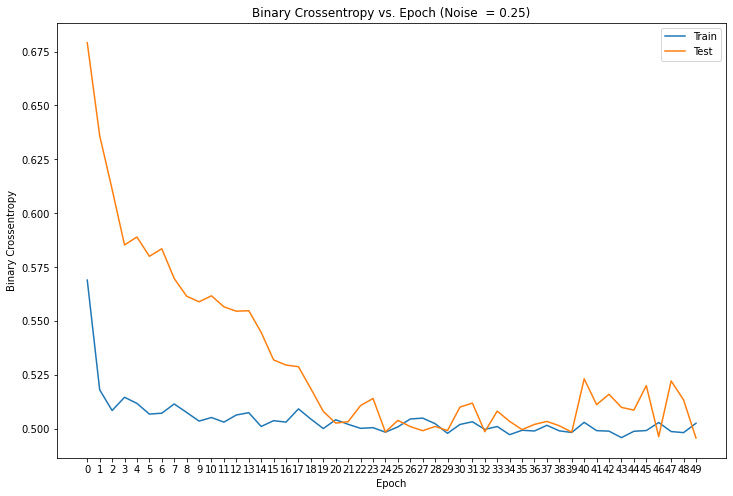

In [29]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.title('Binary Crossentropy vs. Epoch (Noise  = 0.25)')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.xticks(ticks=history.epoch, labels=history.epoch)
plt.show()

Test Autoencoder

In [0]:
results = autoencoder.predict(noisy_test)

In [0]:
image = np.random.randint(0, len(noisy_test))

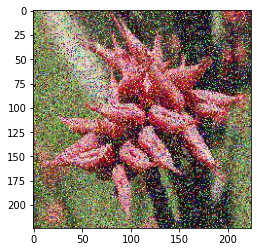

In [32]:
plt.imshow(noisy_test[image])
plt.show()

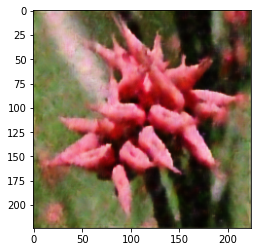

In [33]:
plt.imshow(results[image])
plt.show()

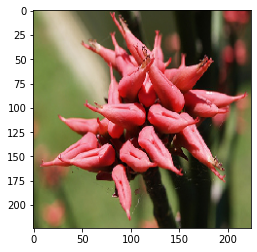

In [34]:
plt.imshow(clean_test[image])
plt.show()

# Noise = 0.5

Import Noisy Images

In [0]:
bad_frames = '/content/drive/My Drive/natural-images/natural_images/noisy_flower/0.5'

In [36]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(224,224))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

In [37]:
print(noisy_frames.shape)

(843, 224, 224, 3)


Split Images Into Training & Test

In [38]:
round(len(noisy_frames)*0.8)

674

In [0]:
#80% of images to training set
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

Autoencoder

In [0]:
autoencoder = tf.keras.models.Sequential()
#Layer 1
autoencoder.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = (224, 224, 3)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 3
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 4
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 5
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 6
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 7
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 8
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 9
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 11
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))

In [41]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 32)      18464     
_________________________________________________________________
batch_normalization_14 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 16)      4624      
_________________________________________________________________
batch_normalization_15 (Batc (None, 224, 224, 16)     

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [43]:
history = autoencoder.fit(noisy_train, clean_train, epochs=50, validation_data=(noisy_test, clean_test))

Epoch 1/50
22/22 [==============================] - 5s 220ms/step - loss: 0.6227 - val_loss: 0.7006
Epoch 2/50
22/22 [==============================] - 5s 211ms/step - loss: 0.5450 - val_loss: 0.7318
Epoch 3/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5317 - val_loss: 0.7530
Epoch 4/50
22/22 [==============================] - 5s 211ms/step - loss: 0.5250 - val_loss: 0.7673
Epoch 5/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5264 - val_loss: 0.7481
Epoch 6/50
22/22 [==============================] - 5s 211ms/step - loss: 0.5219 - val_loss: 0.7125
Epoch 7/50
22/22 [==============================] - 5s 211ms/step - loss: 0.5236 - val_loss: 0.6794
Epoch 8/50
22/22 [==============================] - 5s 212ms/step - loss: 0.5229 - val_loss: 0.6566
Epoch 9/50
22/22 [==============================] - 5s 211ms/step - loss: 0.5156 - val_loss: 0.6446
Epoch 10/50
22/22 [==============================] - 5s 211ms/step - loss: 0.5228 - val_loss: 0.6169

Model History

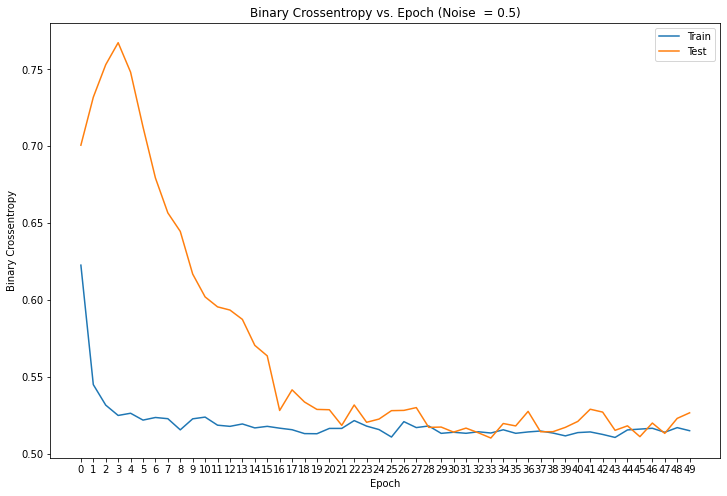

In [44]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.title('Binary Crossentropy vs. Epoch (Noise  = 0.5)')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.xticks(ticks=history.epoch, labels=history.epoch)
plt.show()

Test Autoencoder

In [0]:
results = autoencoder.predict(noisy_test)

In [0]:
image = np.random.randint(0, len(noisy_test))

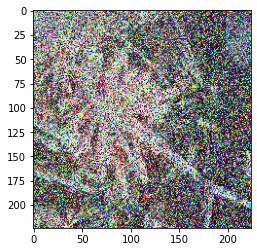

In [47]:
plt.imshow(noisy_test[image])
plt.show()

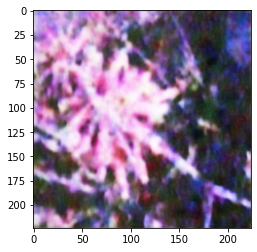

In [48]:
plt.imshow(results[image])
plt.show()

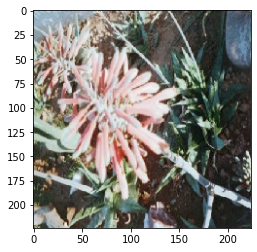

In [49]:
plt.imshow(clean_test[image])
plt.show()

# Noise = 0.75

Import Noisy Images

In [0]:
bad_frames = '/content/drive/My Drive/natural-images/natural_images/noisy_flower/0.75'

In [51]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(224,224))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

In [52]:
print(noisy_frames.shape)

(843, 224, 224, 3)


Split Images Into Training & Test

In [53]:
round(len(noisy_frames)*0.8)

674

In [0]:
#80% of images to training set
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

Autoencoder

In [0]:
autoencoder = tf.keras.models.Sequential()
#Layer 1
autoencoder.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = (224, 224, 3)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 3
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 4
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 5
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 6
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 7
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 8
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 9
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 11
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))

In [56]:
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 224, 224, 32)      18464     
_________________________________________________________________
batch_normalization_21 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 224, 224, 16)      4624      
_________________________________________________________________
batch_normalization_22 (Batc (None, 224, 224, 16)     

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [59]:
history = autoencoder.fit(noisy_train, clean_train, epochs=15, validation_data=(noisy_test, clean_test))

Epoch 1/15
22/22 [==============================] - 5s 212ms/step - loss: 0.5451 - val_loss: 0.6492
Epoch 2/15
22/22 [==============================] - 5s 212ms/step - loss: 0.5449 - val_loss: 0.5720
Epoch 3/15
22/22 [==============================] - 5s 211ms/step - loss: 0.5427 - val_loss: 0.8101
Epoch 4/15
22/22 [==============================] - 5s 211ms/step - loss: 0.5441 - val_loss: 0.5869
Epoch 5/15
22/22 [==============================] - 5s 211ms/step - loss: 0.5403 - val_loss: 0.6154
Epoch 6/15
22/22 [==============================] - 5s 211ms/step - loss: 0.5379 - val_loss: 0.6262
Epoch 7/15
22/22 [==============================] - 5s 211ms/step - loss: 0.5494 - val_loss: 0.6421
Epoch 8/15
22/22 [==============================] - 5s 212ms/step - loss: 0.5398 - val_loss: 0.5662
Epoch 9/15
22/22 [==============================] - 5s 211ms/step - loss: 0.5444 - val_loss: 0.5583
Epoch 10/15
22/22 [==============================] - 5s 211ms/step - loss: 0.5427 - val_loss: 0.5848

Model History

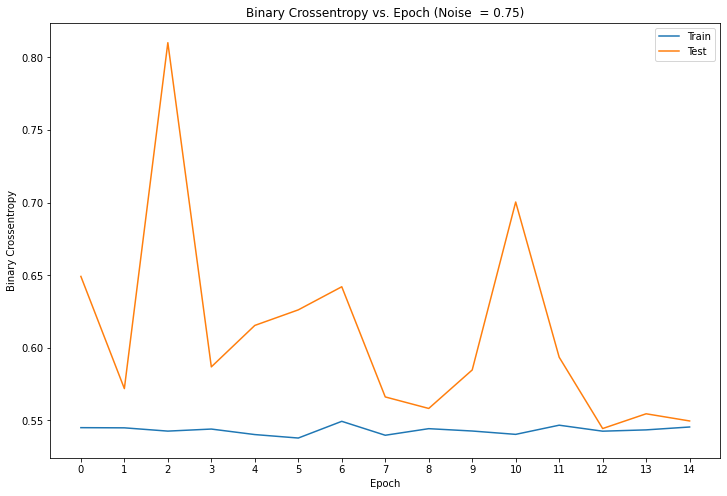

In [60]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.title('Binary Crossentropy vs. Epoch (Noise  = 0.75)')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.xticks(ticks=history.epoch, labels=history.epoch)
plt.show()

Test Autoencoder

In [0]:
results = autoencoder.predict(noisy_test)

In [0]:
image = np.random.randint(0, len(noisy_test))

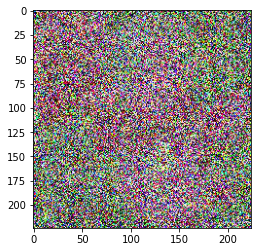

In [65]:
plt.imshow(noisy_test[image])
plt.show()

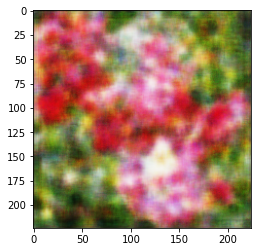

In [66]:
plt.imshow(results[image])
plt.show()

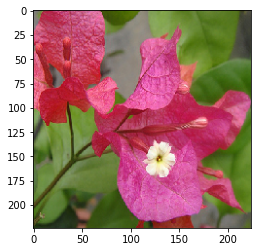

In [67]:
plt.imshow(clean_test[image])
plt.show()

# Noise = 1

Import Noisy Images

In [0]:
bad_frames = '/content/drive/My Drive/natural-images/natural_images/noisy_flower/1'

In [69]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(224,224))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

KeyboardInterrupt: ignored

In [0]:
print(noisy_frames.shape)

Split Images Into Training & Test

In [0]:
round(len(noisy_frames)*0.8)

In [0]:
#80% of images to training set
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

Autoencoder

In [0]:
autoencoder = tf.keras.models.Sequential()
#Layer 1
autoencoder.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = (224, 224, 3)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 3
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 4
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 5
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 6
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 7
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 8
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 9
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 11
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))

In [0]:
autoencoder.summary()

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
history = autoencoder.fit(noisy_train, clean_train, epochs=25, validation_data=(noisy_test, clean_test))

Epoch 1/25
22/22 [==============================] - 5s 211ms/step - loss: 0.5387 - val_loss: 0.5631
Epoch 2/25
22/22 [==============================] - 5s 211ms/step - loss: 0.5455 - val_loss: 0.5887
Epoch 3/25
19/22 [========================>.....] - ETA: 0s - loss: 0.5396

Model History

In [0]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.title('Binary Crossentropy vs. Epoch (Noise  = 1)')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.xticks(ticks=history.epoch, labels=history.epoch)
plt.show()

Test Autoencoder

In [0]:
results = autoencoder.predict(noisy_test)

In [0]:
image = np.random.randint(0, len(noisy_test))

In [0]:
plt.imshow(noisy_test[image])
plt.show()

In [0]:
plt.imshow(results[image])
plt.show()

In [0]:
plt.imshow(clean_test[image])
plt.show()

Train 1 autoencoder for all noise, noise generator to random between 0-1